<a href="https://colab.research.google.com/github/kha-iman972/Vivante-Khaya-Projects/blob/master/Community%20Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Quantum Clustering Starter Notebook for Khaya

This notebook does the following:
- ✅ Loads your real community data from GitHub
- 📊 Visualizes the town needs
- 🧠 Runs classical clustering (KMeans)
- ⚛️ Sets the stage for quantum clustering with Qiskit

In [1]:
!pip install qiskit==0.39.0 qiskit-machine-learning==0.5.0 qiskit-aer==0.11.0 --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 31.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load data from GitHub
url = "https://raw.githubusercontent.com/kha-iman972/Vivante-Khaya-Projects/master/community_research/community_data.csv"
data = pd.read_csv(url)
data

,Town,Garden,Grocery,Youth,Land,Score
0,Clarksdale,1,0,2,1,3
1,Indianola,0,0,1,2,2
2,Drew,0,0,0,2,1
3,Greenville,1,1,2,2,4
4,Greenwood,1,2,2,0,3


In [3]:
# Normalize data
features = data[['Grocery', 'Youth', 'Land']].values
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[0. , 1. , 0.5],
       [0. , 0.5, 1. ],
       [0. , 0. , 1. ],
       [0.5, 1. , 1. ],
       [1. , 1. , 0. ]])

In [4]:
# Classical clustering
kmeans = KMeans(n_clusters=2, random_state=0)
data['Cluster'] = kmeans.fit_predict(features)
data

,Town,Garden,Grocery,Youth,Land,Score,Cluster
0,Clarksdale,1,0,2,1,3,1
1,Indianola,0,0,1,2,2,0
2,Drew,0,0,0,2,1,0
3,Greenville,1,1,2,2,4,0
4,Greenwood,1,2,2,0,3,1


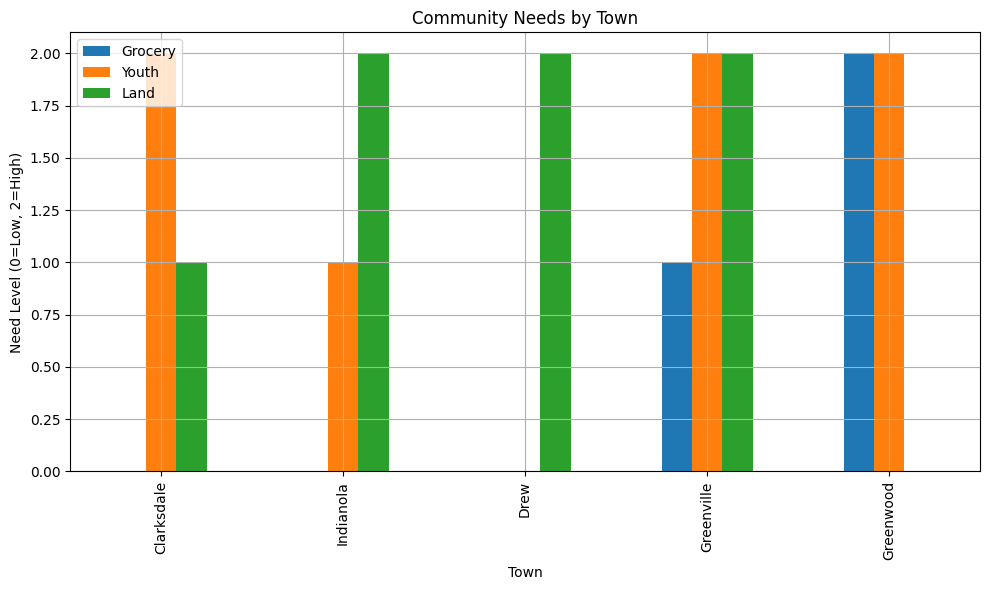

In [5]:
# Visualize clusters
data.set_index('Town')[['Grocery', 'Youth', 'Land']].plot(kind='bar', figsize=(10, 6))
plt.title("Community Needs by Town")
plt.ylabel("Need Level (0=Low, 2=High)")
plt.grid(True)
plt.tight_layout()
plt.show()